In [1]:
#Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
IOT= pd.read_csv("C:\\Users\\Shree\\Downloads\\dataset (3)\\NB-IoT - Passive Measurements.csv")
print("NB-IOT Dataset Load succesfully.")

NB-IOT Dataset Load succesfully.


In [3]:
#print First Five Rows of NB-IOT Dataset
IOT.head()

,Unnamed: 0,Date,Time,UTC,Latitude,Longitude,Altitude,Speed,EARFCN,Frequency,...,NSSS-Power,scenario,cellLongitude,cellLatitude,cellPosErrorLambda1,cellPosErrorLambda2,n_CellIdentities,distance,Band,campaign
0,110097,14.01.2021,09:19:25.380,1.613291e+09,41.896705,12.507339,50.30,3.46,6254,801.4025,...,-47.15,OW,12.50428,41.8903,2.051987,0.772278,3,756.719746,20,campaign_6_OW_NB-IoT_gaming
1,210058,14.01.2021,09:19:25.380,1.613291e+09,41.896705,12.507339,50.30,3.46,6254,801.4025,...,-48.05,OW,12.50428,41.8903,2.051987,0.772278,3,756.719746,20,campaign_6_OW_NB-IoT_gaming
2,310032,14.01.2021,09:19:25.958,1.613291e+09,41.896713,12.507331,49.91,3.92,6254,801.4025,...,-49.71,OW,12.50428,41.8903,2.051987,0.772278,3,757.337346,20,campaign_6_OW_NB-IoT_gaming
3,410000,14.01.2021,09:19:25.958,1.613291e+09,41.896713,12.507331,49.91,3.92,6254,801.4025,...,-46.85,OW,12.50428,41.8903,2.051987,0.772278,3,757.337346,20,campaign_6_OW_NB-IoT_gaming
4,72700,14.01.2021,09:19:27.738,1.613291e+09,41.896722,12.507302,53.66,4.03,6254,801.4025,...,-46.20,OW,12.50428,41.8903,2.051987,0.772278,3,757.483987,20,campaign_6_OW_NB-IoT_gaming


In [4]:
#Display Overall information of Dataset
IOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281481 entries, 0 to 281480
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           281481 non-null  int64  
 1   Date                 281481 non-null  object 
 2   Time                 281481 non-null  object 
 3   UTC                  258891 non-null  float64
 4   Latitude             281481 non-null  float64
 5   Longitude            281481 non-null  float64
 6   Altitude             258901 non-null  float64
 7   Speed                258891 non-null  float64
 8   EARFCN               281481 non-null  int64  
 9   Frequency            281481 non-null  float64
 10  PCI                  281481 non-null  int64  
 11  MNC                  281481 non-null  object 
 12  CellIdentity         281481 non-null  int64  
 13  eNodeB.ID            281481 non-null  int64  
 14  NSINR-Tx0            250948 non-null  float64
 15  NSINR-Tx1        

In [5]:
#Summary statistics of Dataset
IOT.describe()

,Unnamed: 0,UTC,Latitude,Longitude,Altitude,Speed,EARFCN,Frequency,PCI,CellIdentity,...,NRSRQ-Tx0,NRSRQ-Tx1,NSSS-Power,cellLongitude,cellLatitude,cellPosErrorLambda1,cellPosErrorLambda2,n_CellIdentities,distance,Band
count,2.814810e+05,2.588910e+05,281481.000000,281481.000000,258901.000000,258891.000000,281481.000000,281481.000000,281481.000000,2.814810e+05,...,250948.000000,248329.000000,281481.000000,281481.000000,281481.000000,274240.000000,281481.000000,281481.000000,281481.000000,281481.0
mean,3.966403e+05,1.612865e+09,41.876379,12.486588,66.675761,9.379687,6306.255481,806.625409,256.760677,4.446972e+07,...,-18.474325,-18.330911,-76.679730,12.487087,41.876243,5.208720,4.951022,2.182741,777.062604,20.0
std,3.988827e+05,7.236656e+05,0.016985,0.028935,34.234850,15.204272,49.423335,4.939837,145.880666,2.882168e+07,...,6.740334,6.739038,13.096521,0.028978,0.017796,8.203583,8.195730,0.747385,1062.363397,0.0
min,4.000000e+00,1.611914e+09,41.823736,12.426690,-92.970000,0.000000,6254.000000,801.402500,8.000000,1.691941e+07,...,-34.160000,-33.100000,-119.400000,12.426546,41.824584,0.164726,0.000000,1.000000,0.082859,20.0
25%,1.108580e+05,1.612431e+09,41.868493,12.465010,43.720000,1.120000,6254.000000,801.402500,137.000000,1.768818e+07,...,-24.210000,-23.990000,-86.320000,12.465303,41.865077,0.240976,0.158733,2.000000,195.416855,20.0
50%,2.665570e+05,1.612692e+09,41.872635,12.493444,64.000000,3.130000,6353.000000,811.297500,266.000000,1.776856e+07,...,-19.050000,-18.890000,-78.440000,12.493074,41.873666,0.483940,0.274010,2.000000,447.750611,20.0
75%,5.701220e+05,1.613290e+09,41.893862,12.516384,87.720000,6.120000,6353.000000,811.297500,375.000000,7.683207e+07,...,-12.820000,-12.770000,-68.090000,12.513037,41.895079,8.656000,8.252001,3.000000,866.255229,20.0
max,4.211100e+06,1.614353e+09,41.901493,12.533858,350.790000,83.880000,6353.000000,811.297500,503.000000,7.745159e+07,...,-4.400000,-4.400000,-25.800000,12.543056,41.901902,37.010002,37.010002,3.000000,8350.743100,20.0


In [6]:
# Check the number of duplicate rows
num_duplicates = IOT.duplicated().sum()

if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate rows in the dataset.")
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


In [7]:
# Check if there are rows with all null values
if IOT.isnull().all(axis=1).any():
    print("There are rows with all null values.")
else:
    print("There are no rows with all null values.")

There are no rows with all null values.


In [8]:
if IOT.columns.is_unique:
    print("The are not duplicate column names in IOT.")
else:
    print("There are duplicate column names in IOT .")

The are not duplicate column names in IOT.


In [9]:
if IOT.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are missing values in the dataset.


In [10]:
#Missing value in dataset
IOT.isnull().sum()

Unnamed: 0                 0
Date                       0
Time                       0
UTC                    22590
Latitude                   0
Longitude                  0
Altitude               22580
Speed                  22590
EARFCN                     0
Frequency                  0
PCI                        0
MNC                        0
CellIdentity               0
eNodeB.ID                  0
NSINR-Tx0              30533
NSINR-Tx1              33152
NRSRP-Tx0              30533
NRSRP-Tx1              33152
NRSRQ-Tx0              30533
NRSRQ-Tx1              33152
NSSS-Power                 0
scenario                   0
cellLongitude              0
cellLatitude               0
cellPosErrorLambda1     7241
cellPosErrorLambda2        0
n_CellIdentities           0
distance                   0
Band                       0
campaign                   0
dtype: int64

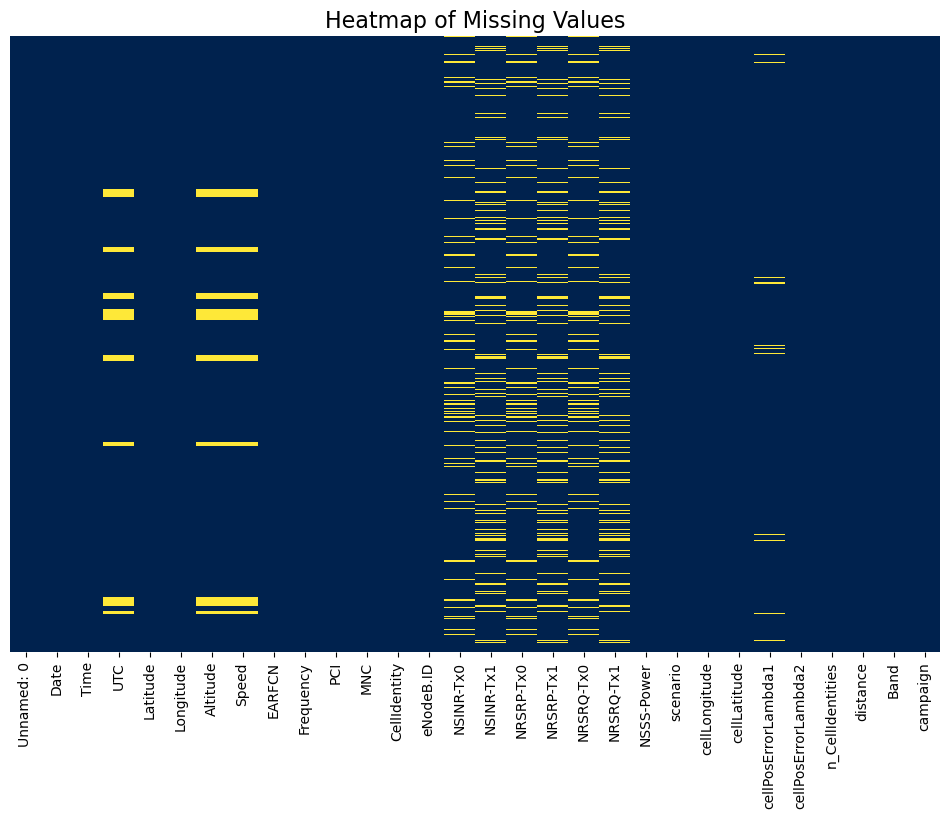

In [11]:
# Visualizing missing data using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap (IOT.isnull(), cbar=False, cmap="cividis", yticklabels=False)
plt.title('Heatmap of Missing Values', fontsize=16)
plt.show()

In [12]:
# Calculate the percentage of missing values per column
missing_percentage = (IOT.isnull().sum() / IOT.shape[0]) * 100

# Display the missing percentages
print("Missing Percentage per Column:")
print(missing_percentage,round(2))

Missing Percentage per Column:
Unnamed: 0              0.000000
Date                    0.000000
Time                    0.000000
UTC                     8.025408
Latitude                0.000000
Longitude               0.000000
Altitude                8.021856
Speed                   8.025408
EARFCN                  0.000000
Frequency               0.000000
PCI                     0.000000
MNC                     0.000000
CellIdentity            0.000000
eNodeB.ID               0.000000
NSINR-Tx0              10.847269
NSINR-Tx1              11.777704
NRSRP-Tx0              10.847269
NRSRP-Tx1              11.777704
NRSRQ-Tx0              10.847269
NRSRQ-Tx1              11.777704
NSSS-Power              0.000000
scenario                0.000000
cellLongitude           0.000000
cellLatitude            0.000000
cellPosErrorLambda1     2.572465
cellPosErrorLambda2     0.000000
n_CellIdentities        0.000000
distance                0.000000
Band                    0.000000
campaign    

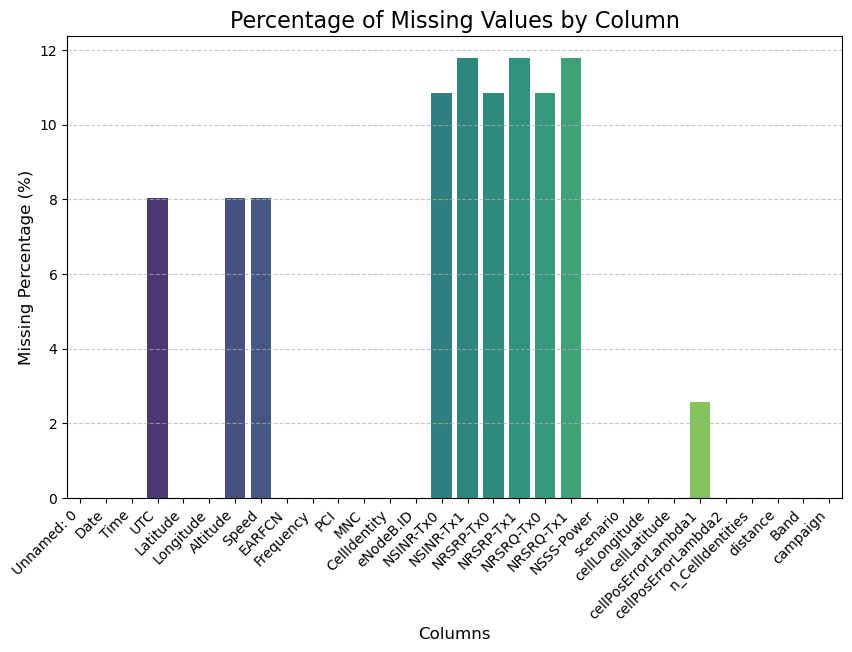

In [13]:
# Plot the bar chart for filtered missing percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='viridis')

# Add labels and title
plt.title("Percentage of Missing Values by Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Missing Percentage (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate column names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Removing Redundant Temporal and Index Columns 
cols_to_drop = ['Unnamed: 0', 'Date', 'Time']
IOT.drop(columns=cols_to_drop, inplace=True)
print("Dropped columns:", cols_to_drop)
print("Remaining columns:", list(IOT.columns))

Dropped columns: ['Unnamed: 0', 'Date', 'Time']
Remaining columns: ['UTC', 'Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency', 'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'NSINR-Tx0', 'NSINR-Tx1', 'NRSRP-Tx0', 'NRSRP-Tx1', 'NRSRQ-Tx0', 'NRSRQ-Tx1', 'NSSS-Power', 'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1', 'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Band', 'campaign']


In [15]:
#retain UTC for Standardized Temporal Analysis
# Convert the 'UTC' column from epoch time (in seconds) to datetime
IOT['UTC'] = pd.to_datetime(IOT['UTC'], unit='s')

# Extract time-based features
IOT['Hour'] = IOT['UTC'].dt.hour         # Extract the hour
IOT['DayOfWeek'] = IOT['UTC'].dt.dayofweek # Extract day of the week (0 = Monday, 6 = Sunday)

# Drop the original 'UTC' column since its information is now in the engineered features
IOT = IOT.drop(columns=['UTC'])

# Preview the processed DataFrame's data types
print(IOT.dtypes)

Latitude               float64
Longitude              float64
Altitude               float64
Speed                  float64
EARFCN                   int64
Frequency              float64
PCI                      int64
MNC                     object
CellIdentity             int64
eNodeB.ID                int64
NSINR-Tx0              float64
NSINR-Tx1              float64
NRSRP-Tx0              float64
NRSRP-Tx1              float64
NRSRQ-Tx0              float64
NRSRQ-Tx1              float64
NSSS-Power             float64
scenario                object
cellLongitude          float64
cellLatitude           float64
cellPosErrorLambda1    float64
cellPosErrorLambda2    float64
n_CellIdentities         int64
distance               float64
Band                     int64
campaign                object
Hour                   float64
DayOfWeek              float64
dtype: object


In [16]:
# Checked 'Band' variance before dropping
band_counts = IOT['Band'].value_counts(normalize=True)
print("Band value distribution (%):\n", band_counts * 100)

if band_counts.iloc[0] > 0.95:
    IOT.drop(columns='Band', inplace=True)
    print("Band dropped due to low variance.")

Band value distribution (%):
 Band
20    100.0
Name: proportion, dtype: float64
Band dropped due to low variance.


In [17]:
#Identify numerical and categorical columns
numerical_columns = IOT.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = IOT.select_dtypes(include=['object']).columns

# Print the columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency',
       'PCI', 'CellIdentity', 'eNodeB.ID', 'NSINR-Tx0', 'NSINR-Tx1',
       'NRSRP-Tx0', 'NRSRP-Tx1', 'NRSRQ-Tx0', 'NRSRQ-Tx1', 'NSSS-Power',
       'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1',
       'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'Hour',
       'DayOfWeek'],
      dtype='object')
Categorical columns: Index(['MNC', 'scenario', 'campaign'], dtype='object')


In [18]:
# Impute missing values for categorical columns using the mode
for col in categorical_columns:
    if col in IOT.columns:
        IOT[col] = IOT[col].fillna(IOT[col].mode()[0])

# Impute missing values for numerical columns using the median
for col in numerical_columns:
    if col in IOT.columns:
        IOT[col] = IOT[col].fillna(IOT[col].median())

# Check if missing values are filled
print("Remaining missing values per column:")
print(IOT.isnull().sum())

Remaining missing values per column:
Latitude               0
Longitude              0
Altitude               0
Speed                  0
EARFCN                 0
Frequency              0
PCI                    0
MNC                    0
CellIdentity           0
eNodeB.ID              0
NSINR-Tx0              0
NSINR-Tx1              0
NRSRP-Tx0              0
NRSRP-Tx1              0
NRSRQ-Tx0              0
NRSRQ-Tx1              0
NSSS-Power             0
scenario               0
cellLongitude          0
cellLatitude           0
cellPosErrorLambda1    0
cellPosErrorLambda2    0
n_CellIdentities       0
distance               0
campaign               0
Hour                   0
DayOfWeek              0
dtype: int64


In [19]:
# Select numerical columns
numerical_columns = IOT.select_dtypes(include=['float64', 'int64']).columns

# Compute Z-score for all numerical columns (without adding to DataFrame)
z_scores = IOT[numerical_columns].apply(zscore)

# Print outlier count for each numerical feature
print("Outliers detected per column:")
for col in numerical_columns:
    outlier_count = (np.abs(z_scores[col]) > 3).sum()
    print(f"{col}: {outlier_count} outliers")

Outliers detected per column:
Latitude: 3331 outliers
Longitude: 0 outliers
Altitude: 3253 outliers
Speed: 8242 outliers
EARFCN: 0 outliers
Frequency: 0 outliers
PCI: 0 outliers
CellIdentity: 0 outliers
eNodeB.ID: 0 outliers
NSINR-Tx0: 1401 outliers
NSINR-Tx1: 1649 outliers
NRSRP-Tx0: 1084 outliers
NRSRP-Tx1: 845 outliers
NRSRQ-Tx0: 0 outliers
NRSRQ-Tx1: 0 outliers
NSSS-Power: 528 outliers
cellLongitude: 0 outliers
cellLatitude: 0 outliers
cellPosErrorLambda1: 8714 outliers
cellPosErrorLambda2: 8714 outliers
n_CellIdentities: 0 outliers
distance: 8266 outliers
Hour: 0 outliers
DayOfWeek: 0 outliers


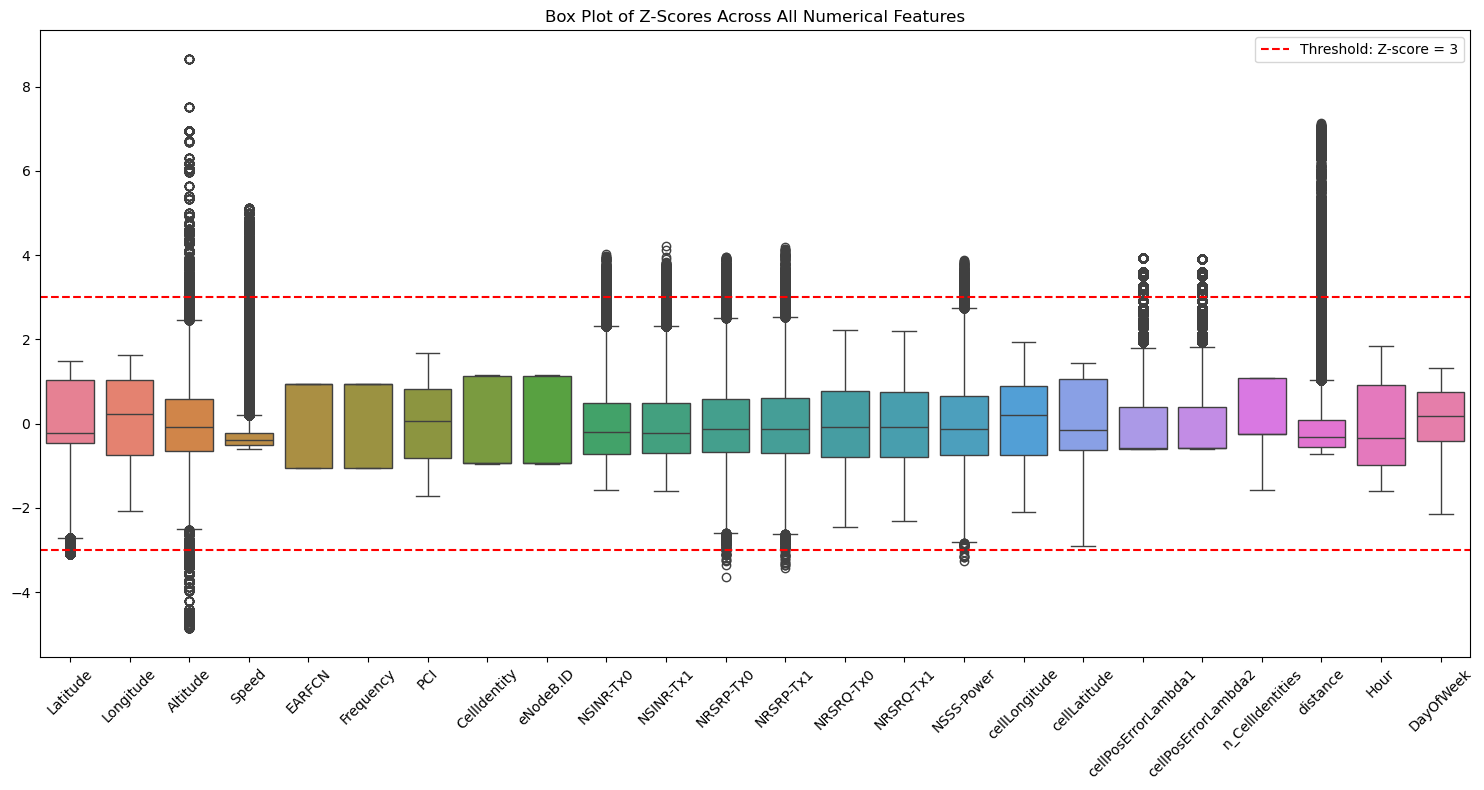

In [21]:
# Compute Z-scores 
z_scores = IOT[numerical_columns].apply(zscore)

# Plot box plot for all numerical features
plt.figure(figsize=(15, 8))
sns.boxplot(data=z_scores)
plt.axhline(y=3, color='r', linestyle='--', label="Threshold: Z-score = 3")
plt.axhline(y=-3, color='r', linestyle='--')
plt.legend()
plt.title("Box Plot of Z-Scores Across All Numerical Features")
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.tight_layout()
plt.show()

In [22]:
#checking columns in dataset
IOT.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency',
       'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'NSINR-Tx0', 'NSINR-Tx1',
       'NRSRP-Tx0', 'NRSRP-Tx1', 'NRSRQ-Tx0', 'NRSRQ-Tx1', 'NSSS-Power',
       'scenario', 'cellLongitude', 'cellLatitude', 'cellPosErrorLambda1',
       'cellPosErrorLambda2', 'n_CellIdentities', 'distance', 'campaign',
       'Hour', 'DayOfWeek'],
      dtype='object')

In [23]:
# Compute average positioning error instead of keeping separate columns
IOT['Avg_CellPosError'] = IOT[['cellPosErrorLambda1', 'cellPosErrorLambda2']].mean(axis=1)

# --- 2. Mobility Feature Engineering ---
# Create speed-to-distance ratio to capture movement impact relative to distance
IOT['Speed_to_Distance_Ratio'] = IOT['Speed'] / (IOT['distance'] + 1)  # Avoid division by zero

# --- 3. Signal Quality Feature Engineering ---
# Compute average signal strength across Tx0 and Tx1 to reduce redundancy
IOT['Avg_NSINR'] = IOT[['NSINR-Tx0', 'NSINR-Tx1']].mean(axis=1)
IOT['Avg_NRSRP'] = IOT[['NRSRP-Tx0', 'NRSRP-Tx1']].mean(axis=1)
IOT['Avg_NRSRQ'] = IOT[['NRSRQ-Tx0', 'NRSRQ-Tx1']].mean(axis=1)

# Drop original signal columns since their aggregated versions are now included
IOT.drop(columns=['NSINR-Tx0', 'NSINR-Tx1', 'NRSRP-Tx0', 'NRSRP-Tx1', 'NRSRQ-Tx0', 'NRSRQ-Tx1'], inplace=True)

# --- 4. Cleanup: Drop Unnecessary Columns ---
IOT.drop(columns=['cellPosErrorLambda1', 'cellPosErrorLambda2'], inplace=True)  # These are now averaged
#iot_data.drop(columns=['Latitude', 'Longitude', 'cellLatitude', 'cellLongitude'], inplace=True)  # Geo_Distance replaces them

# Display the modified dataset with newly engineered features
IOT.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency',
       'PCI', 'MNC', 'CellIdentity', 'eNodeB.ID', 'NSSS-Power', 'scenario',
       'cellLongitude', 'cellLatitude', 'n_CellIdentities', 'distance',
       'campaign', 'Hour', 'DayOfWeek', 'Avg_CellPosError',
       'Speed_to_Distance_Ratio', 'Avg_NSINR', 'Avg_NRSRP', 'Avg_NRSRQ'],
      dtype='object')

In [24]:
# Label Encoding for MNC
le_MNC = LabelEncoder()
IOT['MNC_lbl'] = le_MNC.fit_transform(IOT['MNC'])

# Label Encoding for scenario
le_scenario = LabelEncoder()
IOT['scenario_lbl'] = le_scenario.fit_transform(IOT['scenario'])

# Frequency Encoding for campaign
campaign_freq = IOT['campaign'].value_counts(normalize=True)
IOT['campaign_freq'] = IOT['campaign'].map(campaign_freq)

# Remove the Original Columns
IOT.drop(columns=['MNC', 'scenario', 'campaign'], inplace=True)

# Verify Encoding Completion
print("Encoding completed Updated dataset shape:", IOT.shape)
IOT.head()

Encoding completed Updated dataset shape: (281481, 24)


,Latitude,Longitude,Altitude,Speed,EARFCN,Frequency,PCI,CellIdentity,eNodeB.ID,NSSS-Power,...,Hour,DayOfWeek,Avg_CellPosError,Speed_to_Distance_Ratio,Avg_NSINR,Avg_NRSRP,Avg_NRSRQ,MNC_lbl,scenario_lbl,campaign_freq
0,41.896705,12.507339,50.30,3.46,6254,801.4025,412,76860486,300236,-47.15,...,8.0,6.0,1.412133,0.004566,6.420,-59.105,-10.965,0,2,0.026638
1,41.896705,12.507339,50.30,3.46,6254,801.4025,411,76860488,300236,-48.05,...,8.0,6.0,1.412133,0.004566,7.020,-59.095,-10.955,0,2,0.026638
2,41.896713,12.507331,49.91,3.92,6254,801.4025,412,76860486,300236,-49.71,...,8.0,6.0,1.412133,0.005169,3.020,-61.015,-13.215,0,2,0.026638
3,41.896713,12.507331,49.91,3.92,6254,801.4025,411,76860488,300236,-46.85,...,8.0,6.0,1.412133,0.005169,10.155,-57.405,-9.510,0,2,0.026638
4,41.896722,12.507302,53.66,4.03,6254,801.4025,412,76860486,300236,-46.20,...,8.0,6.0,1.412133,0.005313,-0.185,-56.120,-12.750,0,2,0.026638


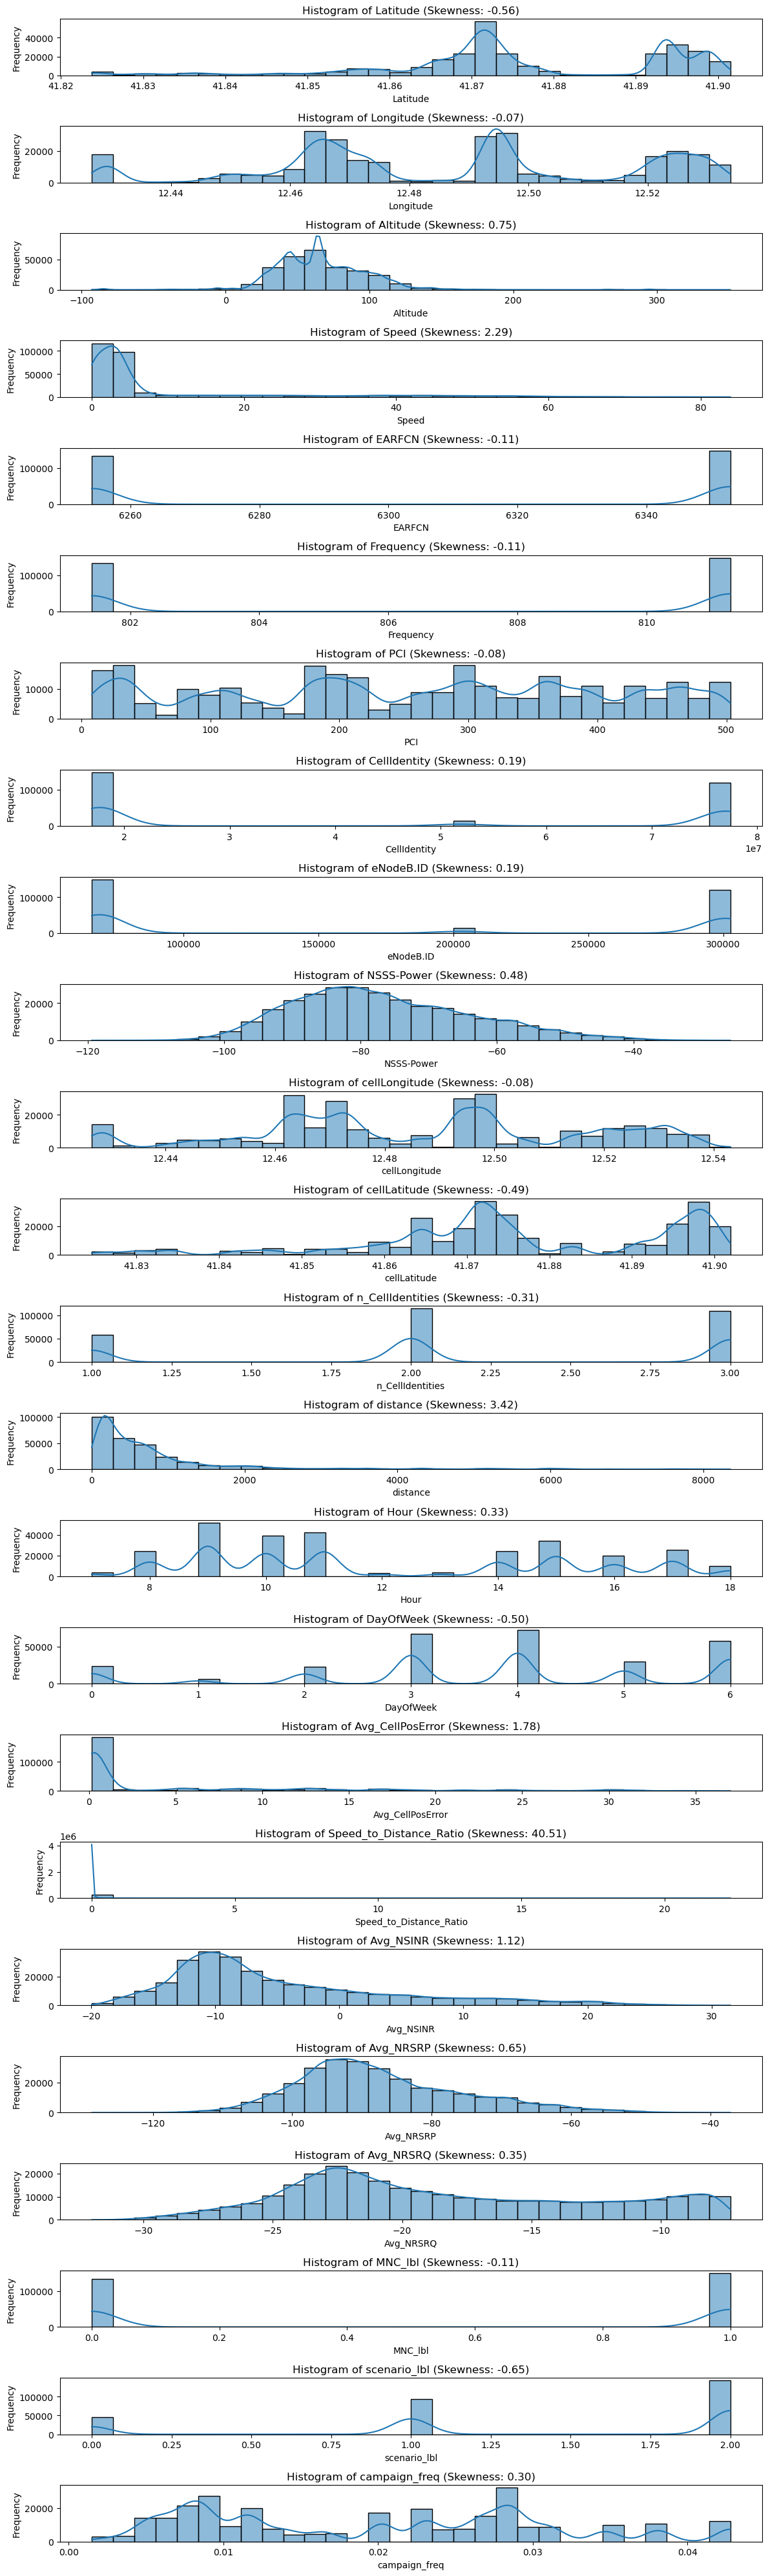

In [25]:
# Select numerical columns
numerical_columns = IOT.select_dtypes(include=['number']).columns

# Create subplots for all numerical features
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(12, 40))

for i, col in enumerate(numerical_columns):
    sns.histplot(IOT[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Histogram of {col} (Skewness: {IOT[col].skew():.2f})")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [26]:
#updated after cleaning and pre processing
IOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281481 entries, 0 to 281480
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Latitude                 281481 non-null  float64
 1   Longitude                281481 non-null  float64
 2   Altitude                 281481 non-null  float64
 3   Speed                    281481 non-null  float64
 4   EARFCN                   281481 non-null  int64  
 5   Frequency                281481 non-null  float64
 6   PCI                      281481 non-null  int64  
 7   CellIdentity             281481 non-null  int64  
 8   eNodeB.ID                281481 non-null  int64  
 9   NSSS-Power               281481 non-null  float64
 10  cellLongitude            281481 non-null  float64
 11  cellLatitude             281481 non-null  float64
 12  n_CellIdentities         281481 non-null  int64  
 13  distance                 281481 non-null  float64
 14  Hour

In [27]:
# Identify the columns to normalize: typically numerical features (adjust if necessary)
numerical_columns = IOT.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
IOT[numerical_columns] = scaler.fit_transform(IOT[numerical_columns])

# Verify the transformation
print("Normalization completed! Updated dataset shape:", IOT.shape)

Normalization completed! Updated dataset shape: (281481, 24)


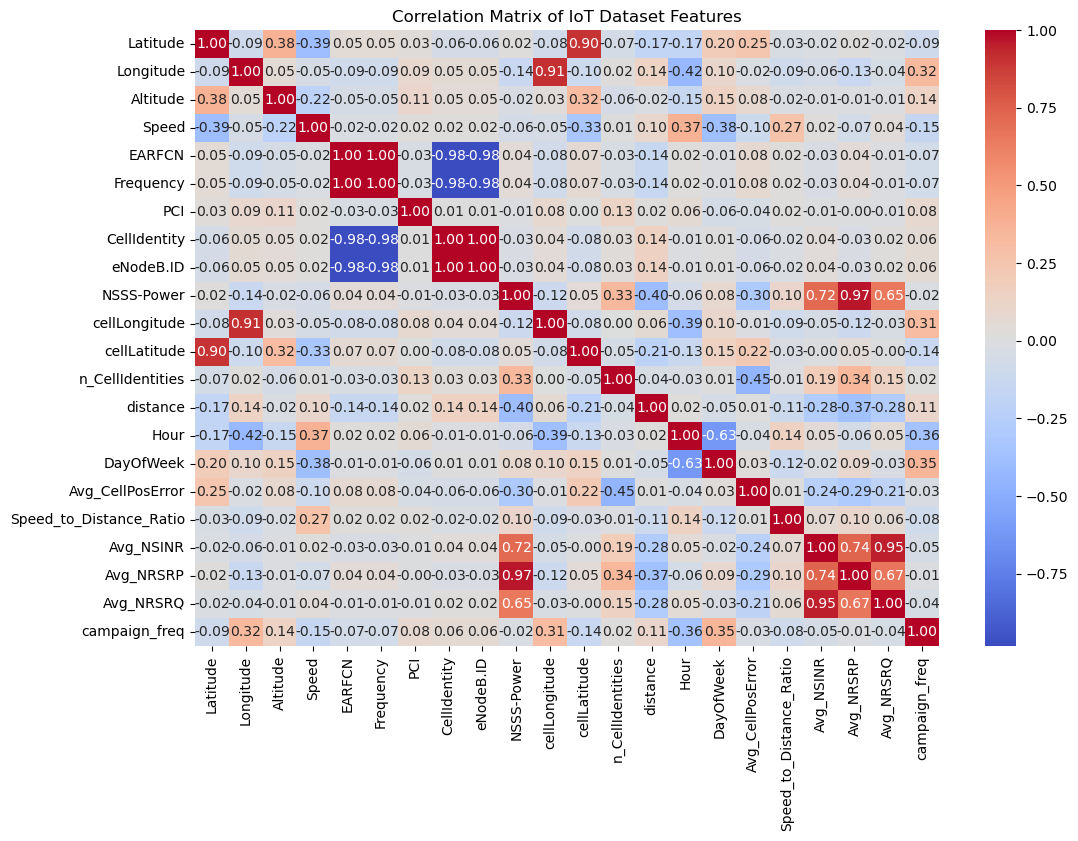

In [28]:
# Select only numerical columns for correlation analysis
numerical_data = IOT.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)
plt.title("Correlation Matrix of IoT Dataset Features")
plt.show()

In [29]:
#features after preprocessing
IOT.columns

Index(['Latitude', 'Longitude', 'Altitude', 'Speed', 'EARFCN', 'Frequency',
       'PCI', 'CellIdentity', 'eNodeB.ID', 'NSSS-Power', 'cellLongitude',
       'cellLatitude', 'n_CellIdentities', 'distance', 'Hour', 'DayOfWeek',
       'Avg_CellPosError', 'Speed_to_Distance_Ratio', 'Avg_NSINR', 'Avg_NRSRP',
       'Avg_NRSRQ', 'MNC_lbl', 'scenario_lbl', 'campaign_freq'],
      dtype='object')

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
#selected features for task-2
cluster_features = [
    'Avg_NSINR',         # Signal-to-Interference-plus-Noise Ratio – Quality indicator
    'Avg_NRSRP',         # Reference Signal Received Power – Signal strength
    'Avg_NRSRQ',         # Reference Signal Received Quality – Quality of signal
    'NSSS-Power',        # Synchronization Signal Block Power – Beam strength indicator
    'Speed',             # UE (User Equipment) speed – Mobility state
    'distance',          # Distance between UE and cell – Signal decay relevance
    'n_CellIdentities'   # Number of detected cells – Network complexity/load
]
X_cluster = IOT[cluster_features]

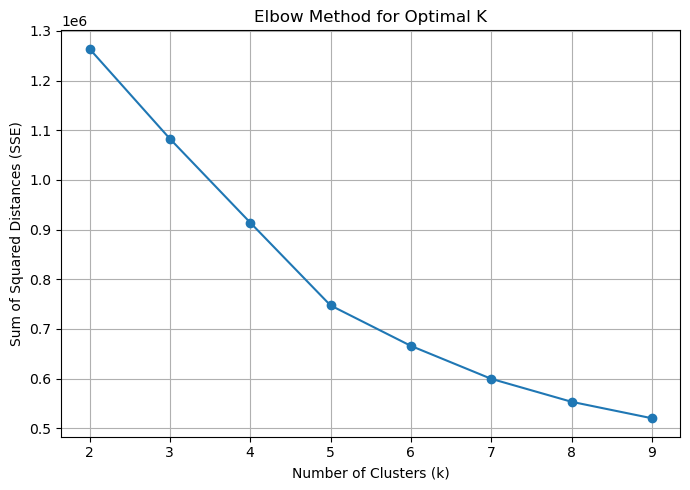

In [32]:
# Elbow Plot
sse = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    sse.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Apply KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
IOT['kmeans_cluster'] = kmeans.fit_predict(X_cluster)

kmeans_score = silhouette_score(X_cluster, IOT['kmeans_cluster'])
print(f"KMeans Silhouette Score: {kmeans_score:.4f}")

KMeans Silhouette Score: 0.2587


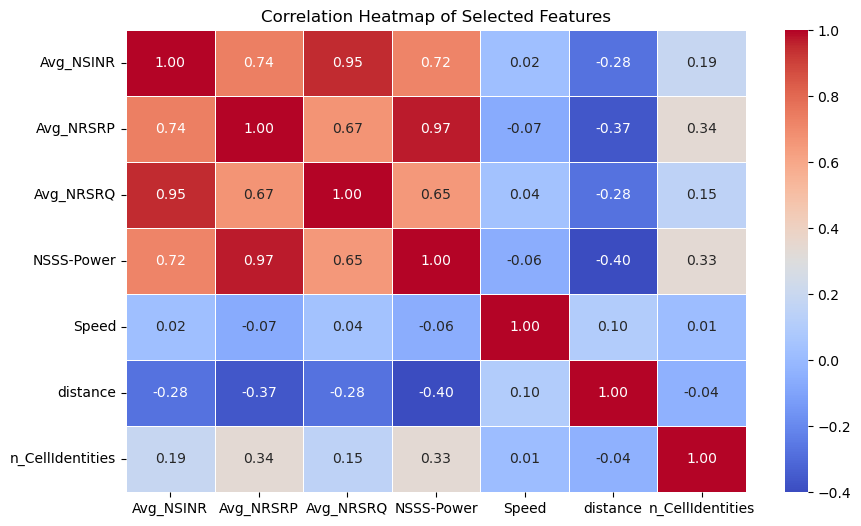

In [34]:
# Create a correlation matrix
correlation_matrix = X_cluster.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

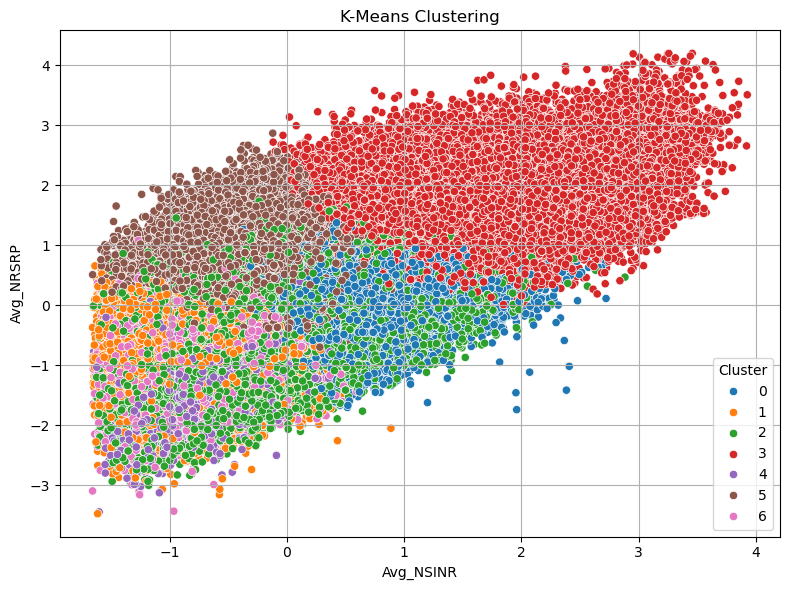

In [35]:
# Visualize Clusters (2D Only)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_cluster.iloc[:, 0], 
    y=X_cluster.iloc[:, 1], 
    hue=IOT['kmeans_cluster'], 
    palette='tab10', 
    legend='full'
)
plt.title('K-Means Clustering')
plt.xlabel(X_cluster.columns[0])
plt.ylabel(X_cluster.columns[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
print(kmeans.cluster_centers_.shape)
X_cluster = X_cluster[['Avg_NSINR', 'Avg_NRSRP', 'Avg_NRSRQ', 'NSSS-Power', 'Speed', 'distance', 'n_CellIdentities']]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_cluster)

(7, 7)


KMeans(n_clusters=7, random_state=42)

In [37]:
# Cluster Summary 
print("\nKMeans Cluster Counts:")
print(IOT['kmeans_cluster'].value_counts().sort_index())

print("\nCluster Centers:")
print(pd.DataFrame(kmeans.cluster_centers_, columns=X_cluster.columns).round(2))


KMeans Cluster Counts:
kmeans_cluster
0    37541
1    72027
2    25522
3    46201
4    11876
5    49473
6    38841
Name: count, dtype: int64

Cluster Centers:
   Avg_NSINR  Avg_NRSRP  Avg_NRSRQ  NSSS-Power  Speed  distance  \
0       0.57       0.06       0.91        0.13  -0.28     -0.27   
1      -0.68      -0.65      -0.72       -0.68  -0.35      0.02   
2      -0.26      -0.50      -0.16       -0.45   2.60      0.30   
3       1.74       1.61       1.50        1.55  -0.04     -0.46   
4      -0.76      -0.95      -0.83       -1.14  -0.11      3.88   
5      -0.25       0.48      -0.25        0.55  -0.31     -0.39   
6      -0.64      -0.74      -0.64       -0.77  -0.30     -0.11   

   n_CellIdentities  
0             -0.54  
1              0.21  
2              0.03  
3              0.59  
4              0.01  
5              0.77  
6             -1.58  


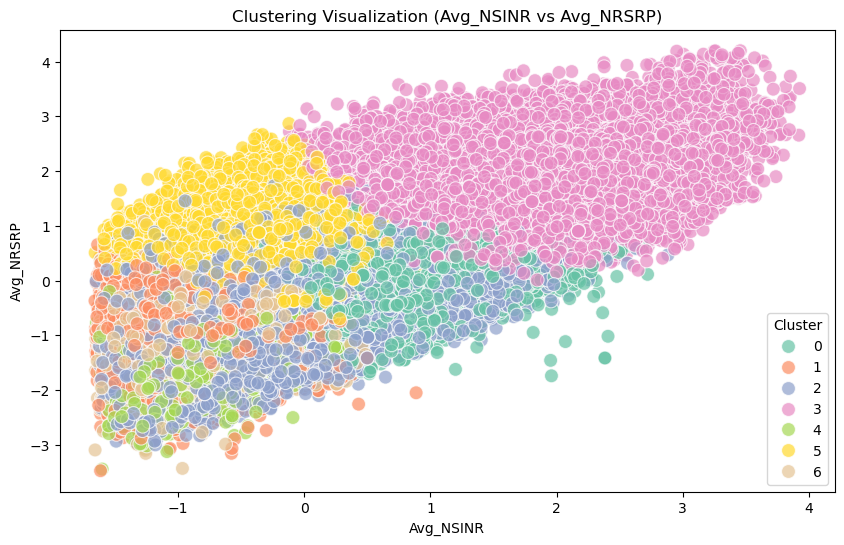

In [38]:
# Apply KMeans (or GMM) clustering
kmeans = KMeans(n_clusters=7, random_state=42)
cluster_labels = kmeans.fit_predict(X_cluster)

# Add the cluster labels to the dataset
X_cluster['Cluster'] = cluster_labels

# Visualize clusters in a 2D plot (using Avg_NSINR and Avg_NRSRP as x and y axes)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_NSINR', y='Avg_NRSRP', hue='Cluster', palette='Set2', data=X_cluster, s=100, alpha=0.7)
plt.title('Clustering Visualization (Avg_NSINR vs Avg_NRSRP)')
plt.xlabel('Avg_NSINR')
plt.ylabel('Avg_NRSRP')
plt.legend(title='Cluster')
plt.show()

In [39]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [40]:
# Apply GMM
gmm = GaussianMixture(n_components=7, covariance_type='full', random_state=42)
IOT['gmm_cluster'] = gmm.fit_predict(X_cluster)

In [41]:
#Evaluate Performance
gmm_score = silhouette_score(X_cluster, IOT['gmm_cluster'])
print(f"GMM Silhouette Score: {gmm_score:.4f}")

GMM Silhouette Score: 0.4536


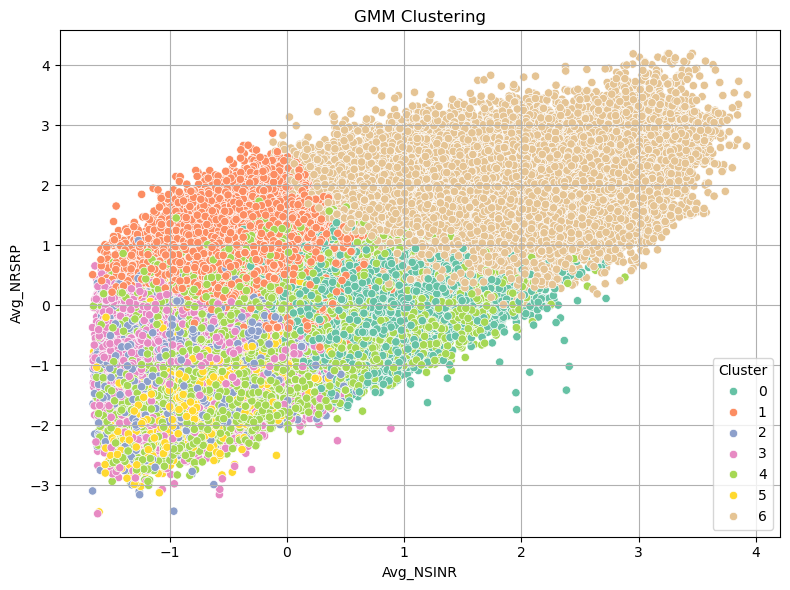

In [42]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_cluster.iloc[:, 0], 
    y=X_cluster.iloc[:, 1], 
    hue=IOT['gmm_cluster'], 
    palette='Set2', 
    legend='full'
)
plt.title('GMM Clustering')
plt.xlabel(X_cluster.columns[0])
plt.ylabel(X_cluster.columns[1])
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
#GMM Cluster Summary
print("\nGMM Cluster Counts:")
print(IOT['gmm_cluster'].value_counts().sort_index())

print("\nGMM Means:")
print(pd.DataFrame(gmm.means_, columns=X_cluster.columns).round(2))



GMM Cluster Counts:
gmm_cluster
0    37541
1    49473
2    38841
3    72027
4    25522
5    11876
6    46201
Name: count, dtype: int64

GMM Means:
   Avg_NSINR  Avg_NRSRP  Avg_NRSRQ  NSSS-Power  Speed  distance  \
0       0.58       0.06       0.91        0.13  -0.28     -0.27   
1      -0.25       0.48      -0.26        0.55  -0.31     -0.39   
2      -0.64      -0.74      -0.64       -0.76  -0.30     -0.11   
3      -0.68      -0.66      -0.72       -0.68  -0.35      0.02   
4      -0.26      -0.50      -0.16       -0.45   2.60      0.30   
5      -0.76      -0.95      -0.83       -1.14  -0.11      3.88   
6       1.74       1.61       1.50        1.55  -0.04     -0.46   

   n_CellIdentities  Cluster  
0             -0.54      0.0  
1              0.77      5.0  
2             -1.58      6.0  
3              0.21      1.0  
4              0.03      2.0  
5              0.01      4.0  
6              0.59      3.0  


Initial class distribution:
 is_coverage_good
1    281481
Name: count, dtype: int64

Only one class at –115 dBm; using median (-0.2 dBm) instead.
Updated class distribution:
 is_coverage_good
0    140784
1    140697
Name: count, dtype: int64

=== Logistic Regression (Binary) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28157
           1       1.00      1.00      1.00     28140

    accuracy                           1.00     56297
   macro avg       1.00      1.00      1.00     56297
weighted avg       1.00      1.00      1.00     56297

Accuracy: 0.999076327335382


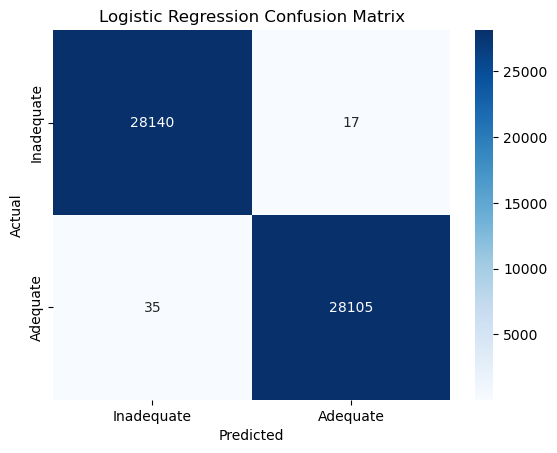

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# features & binary target 
features = ['Avg_NRSRP', 'Avg_NRSRQ', 'Avg_NSINR', 'Speed', 'distance', 'n_CellIdentities']
IOT['is_coverage_good'] = (IOT['Avg_NRSRP'] > -115).astype(int)

# Ensure two classes exist; otherwise adjust threshold 
dist = IOT['is_coverage_good'].value_counts()
print("Initial class distribution:\n", dist)
if dist.shape[0] < 2:
    median_val = IOT['Avg_NRSRP'].median()
    print(f"\nOnly one class at –115 dBm; using median ({median_val:.1f} dBm) instead.")
    IOT['is_coverage_good'] = (IOT['Avg_NRSRP'] > median_val).astype(int)
    print("Updated class distribution:\n", IOT['is_coverage_good'].value_counts())

# Split & scale once for both models
X = IOT[features]
y = IOT['is_coverage_good']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# Model 1 Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_s, y_train)
y_pred_lr = lr.predict(X_test_s)

print("\n=== Logistic Regression (Binary) ===")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Inadequate','Adequate'],
            yticklabels=['Inadequate','Adequate'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


=== Random Forest (Binary) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28157
           1       1.00      1.00      1.00     28140

    accuracy                           1.00     56297
   macro avg       1.00      1.00      1.00     56297
weighted avg       1.00      1.00      1.00     56297

Accuracy: 0.9999822370641419


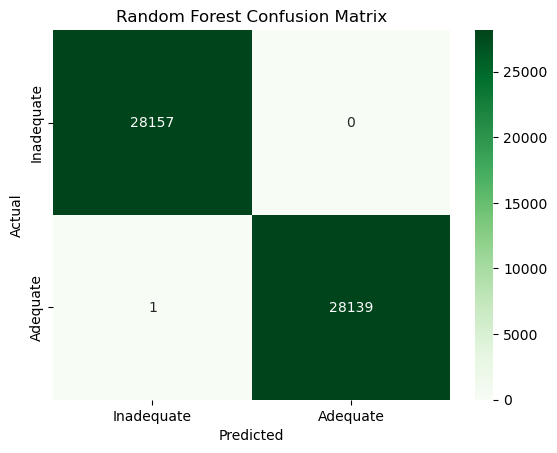

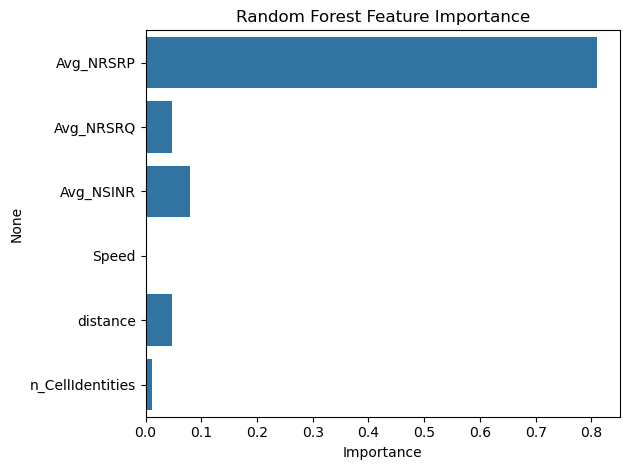

In [45]:
# Model 2 Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # RF works on unscaled data
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest (Binary) ===")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Inadequate','Adequate'],
            yticklabels=['Inadequate','Adequate'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance for Random Forest
importances = pd.Series(rf.feature_importances_, index=features)
sns.barplot(x=importances, y=importances.index)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [49]:
# Feature set (from your selected clustering features)
features = [
    'Avg_NSINR', 'Avg_NRSRP', 'Avg_NRSRQ',
    'NSSS-Power', 'Speed', 'distance', 'n_CellIdentities'
]

X = IOT[cluster_features]
y = IOT['scenario_lbl']  # encoded label (IS = 0, OS = 1, OW = 2 or similar)


In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.31      0.35      9163
           1       0.72      0.60      0.66     18588
           2       0.64      0.77      0.70     28546

    accuracy                           0.64     56297
   macro avg       0.59      0.56      0.57     56297
weighted avg       0.63      0.64      0.63     56297



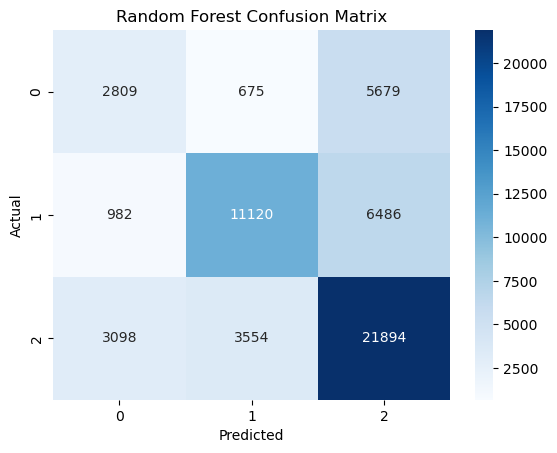

In [51]:
# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test_pca)

# Evaluate
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

🔍 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.15      0.23      9163
           1       0.86      0.55      0.67     18588
           2       0.63      0.92      0.75     28546

    accuracy                           0.67     56297
   macro avg       0.69      0.54      0.55     56297
weighted avg       0.70      0.67      0.64     56297



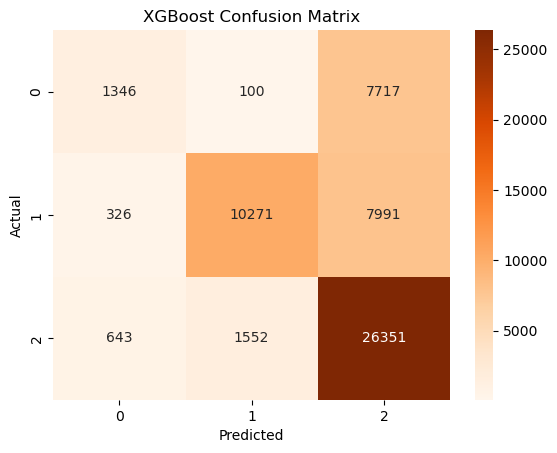

In [52]:
# Initialize and train
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_pca, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_pca)

# Evaluate
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [54]:
# Features and target
X = IOT[cluster_features]
y = IOT['scenario_lbl']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# TPOT Classifier with genetic algorithm search
tpot = TPOTClassifier(
    generations=5,           # Number of generations to run
    population_size=20,      # Number of individuals in each generation
    verbosity=2,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1                # Use all available cores
)

tpot.fit(X_train_scaled, y_train)

# Evaluate optimized pipeline
y_pred_tpot = tpot.predict(X_test_scaled)
print("\n TPOT Optimized Model Report:")
print(classification_report(y_test, y_pred_tpot))

Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9202163488226868

Generation 2 - Current best internal CV score: 0.9302659108980279

Generation 3 - Current best internal CV score: 0.9302659108980279

Generation 4 - Current best internal CV score: 0.9380861860484104

Generation 5 - Current best internal CV score: 0.9383792799723899

Best pipeline: XGBClassifier(XGBClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.15, sparse=False, threshold=10), learning_rate=0.5, max_depth=9, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0), learning_rate=1.0, max_depth=2, min_child_weight=10, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)

 TPOT Optimized Model Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9163
           1       0.94      0.91      0.93     18588
           2       0.93      0.95      0.94     28546

    accuracy                           0.94     56297
   ma

In [56]:
baseline = RandomForestClassifier(random_state=42)
baseline.fit(X_train_scaled, y_train)
y_pred_baseline = baseline.predict(X_test_scaled)

print("Baseline Random Forest Performance:")
print(classification_report(y_test, y_pred_baseline))
print("Accuracy:", accuracy_score(y_test, y_pred_baseline))

Baseline Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      9163
           1       0.95      0.90      0.93     18588
           2       0.92      0.97      0.94     28546

    accuracy                           0.94     56297
   macro avg       0.95      0.93      0.94     56297
weighted avg       0.94      0.94      0.94     56297

Accuracy: 0.9387001083539087


In [57]:
tpot.export('best_pipeline.py')

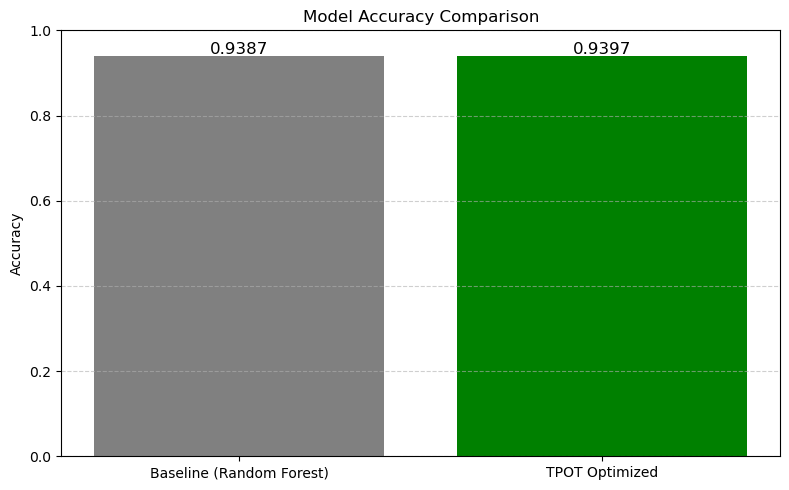

In [58]:

baseline_acc = accuracy_score(y_test, y_pred_baseline)
tpot_acc = accuracy_score(y_test, y_pred_tpot)

# Labels and values
models = ['Baseline (Random Forest)', 'TPOT Optimized']
accuracies = [baseline_acc, tpot_acc]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['gray', 'green'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}', ha='center', fontsize=12)

plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()